# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [37]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
select= ds.iloc[:,1:]

ds.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [5]:
max_price = ds["price"].max()
id_casa_cara = ds["price"].idxmax()
dire_casa_cara = ds.loc[id_casa_cara, "address"]

print(f"The house with adress {dire_casa_cara} is the most expensive and its price is {max_price} USD")

The house with adress El Escorial is the most expensive and its price is 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [6]:
precioreal = select[select["price"]> 0]
min_price = precioreal["price"].min()
filtro = precioreal[precioreal["price"] == min_price]
x= filtro["price"].iloc[0]
z= filtro["address"].iloc[0]

print(f"The house with adress {z} is the cheaper and its price is {x} USD")

The house with adress Berlin, Coslada is the cheaper and its price is 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [7]:
surf = ds[ds["surface"] != "NaN"]

casa_peq = surf["surface"].min()
id_casa_peq = surf["surface"].idxmin()
dire_casa_peq = surf.loc[id_casa_peq, "address"]

casa_gran = surf["surface"].max()
id_casa_gran = surf["surface"].idxmax()
dire_casa_gran = surf.loc[id_casa_gran, "address"]

print (f"The biggest house is located on {dire_casa_gran} and its surface {casa_gran} meters")
print (f"The smallest house is located on {dire_casa_peq} and its surface {casa_peq} meters")

The biggest house is located on Sevilla la Nueva and its surface 249000.0 meters
The smallest house is located on Calle Amparo,  Madrid Capital and its surface 15.0 meters


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [8]:
result = ", ".join(map(str, ds["level5"]))
print(result)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Fuenlabrada, Arganda del Rey, Las Rozas de Madrid, Las Rozas de Madrid, Las Rozas de Madrid, Las Rozas de Madrid,  Madrid Capital,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero,  Madrid Capital,  Madrid Capital,  Madrid Capital, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes,  Madrid Capital, Rivas-vaciamadrid, Alpedrete,  Madrid Capital,  Madrid Capital,  Madrid Capital, Móstoles,  Madrid Capital,  Madrid Capital,  Madrid Capital, San Fernando de Henares, Coslada,  Madrid Capital, Becerril de la Sierra,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital, Alcalá de Henares,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital, Pinto,  Madrid Capital,  Madrid Capital,

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [9]:
hay_nans = pd.isna(ds).any()
print(hay_nans)

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [10]:
deletednan = ds.dropna(axis= 1)
deletedtop = deletednan.dropna(axis =0)


print(f"Dimension of the original dataset is {ds.shape}")
print(f"Dimension of the dataset after Nas deleting is {deletednan.shape}")

Dimension of the original dataset is (15335, 37)
Dimension of the dataset after Nas deleting is (15335, 25)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [43]:
arroy = ds[ds["level5"] == "Arroyomolinos"]
prices = arroy["price"]
media = prices.mean()



print(media)

<bound method DataFrame.isna of Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]>


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


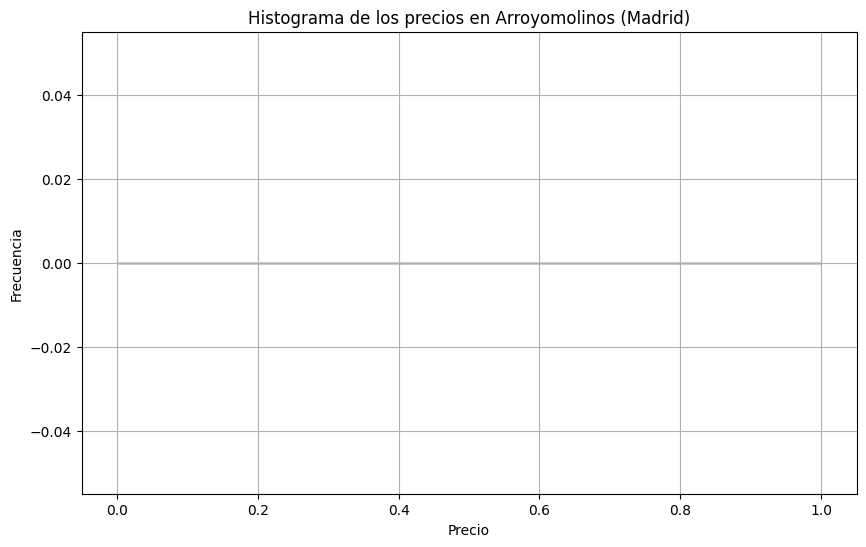

In [46]:
prices = arroy["price"]


plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma de los precios en Arroyomolinos (Madrid)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [12]:
valde = ds[ds["level5"] == "Valdemorillo"]
prices_valde = valde["price"]
media_valde= prices_valde.mean()



galap = ds[ds["level5"] == "Galapagar"]
prices_galap = galap["price"]
media_galap= prices_galap.mean()

print(f"The average price in Valdemorillo is {media_valde} USD")
print (f"The average price in Valdemorillo is {media_galap} USD"

The average price in Valdemorillo is 363860.2931034483 USD
The average price in Valdemorillo is 360063.20238095237 USD


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [17]:
ds['pps'] = ds['price'] // ds['surface'] 
precio_metro_valdemo = ds[ds["level5"] == "Valdemorillo"]
respuesta_valde = precio_metro_valdemo["pps"]
media_rv = respuesta_valde.mean()

precio_metro_galap = ds[ds["level5"] == "Galapagar"]
respuesta_galap = precio_metro_galap["pps"]
media_rg = respuesta_galap.mean()

print(media_rv)
print(media_rg)
print(f"El precio medio en Valdemorillo es de {media_rv} USD y el precio medio en Galapagar es de {media_rg} USD, por lo que no tienen el mismo precio promedio")

1317.5471698113208
1605.88
El precio medio en Valdemorillo es de 1317.5471698113208 USD y el precio medio en Galapagar es de 1605.88 USD, por lo que no tienen el mismo precio promedio


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

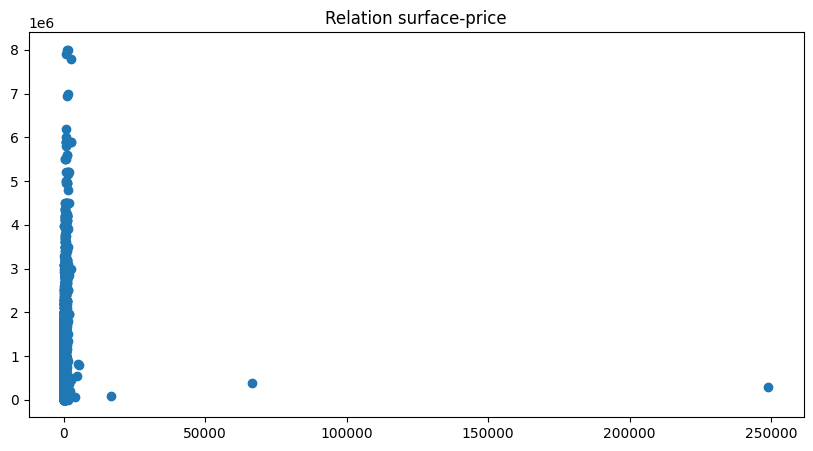

In [18]:
superficie = ds["surface"]
precio = ds["price"]

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.scatter(superficie,precio,)
plt.title("Relation surface-price")
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [21]:
agencias = ds["realEstate_name"]
cuantas_agencias = len(agencias)


print (f"Hay {cuantas_agencias} agencias en total")

Hay 15335 agencias en total


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [22]:
conteo_casas = ds["level5"].value_counts()
poblacion_mas_casas = conteo_casas.idxmax()
max_poblacion = conteo_casas.max()


print(f"The population with most houses is {poblacion_mas_casas} with {max_poblacion} houses")

The population with most houses is  Madrid Capital with 6643 houses


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [24]:
south_belt = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
subset = ds[ds["level5"].isin(south_belt)]
conteo_southbelt = subset.value_counts()

print(conteo_southbelt)

Series([], Name: count, dtype: int64)


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

Median price in southbelt is: level5
Alcorcón       179500.0
Fuenlabrada    155000.0
Getafe         285305.0
Leganés        169950.0
Name: price, dtype: float64


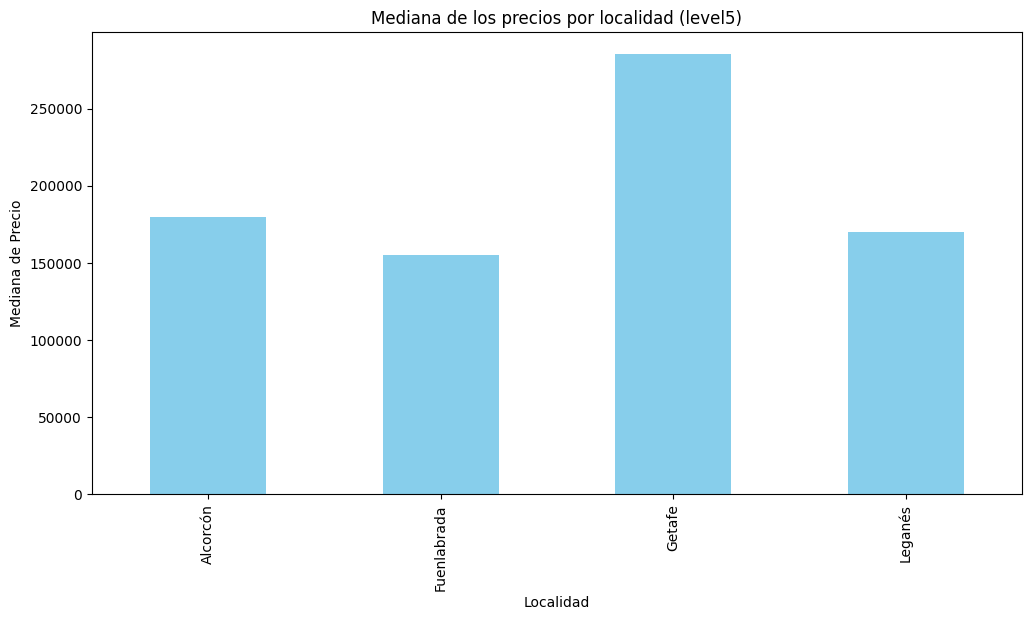

In [48]:
mediana_precio = subset.groupby("level5")["price"].median()

print(f"Median price in southbelt is: {mediana_precio}")

plt.figure(figsize=(12, 6))
mediana_precio.plot(kind='bar', color='skyblue')

plt.title("Mediana de los precios por localidad (level5)")
plt.xlabel("Localidad")
plt.ylabel("Mediana de Precio")

plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [25]:
medias_precio = subset.groupby("level5")["price"].mean()
medias_habitaciones = subset.groupby("level5")["rooms"].mean()
medias_superficie = subset.groupby("level5")["surface"].mean()
medias_baños = subset.groupby("level5")["bathrooms"].mean()

varianza_precio = subset.groupby("level5")["price"].var()
varianza_habitaciones = subset.groupby("level5")["rooms"].var()
varianza_superficie = subset.groupby("level5")["surface"].var()
varianza_baños = subset.groupby("level5")["bathrooms"].var()


print(f"Average price in southbelt is: {medias_precio}")

print(f"Average number of rooms in southbelt is: {medias_habitaciones}")

print(f"Average surface in southbelt is: {medias_superficie}")

print(f"Average number of bathrooms in southbelt is: {medias_baños}")


print(f"Variance of price in southbelt is: {varianza_precio}")

print(f"Variance of number of rooms in southbelt is: {varianza_habitaciones}")

print(f"Variance of surface in southbelt is: {varianza_superficie}")

print(f"Variance of number of bathrooms in southbelt is: {varianza_baños}")

Average price in southbelt is: level5
Alcorcón       230071.052632
Fuenlabrada    177198.021459
Getafe         265040.500000
Leganés        208682.010309
Name: price, dtype: float64
Average number of rooms in southbelt is: level5
Alcorcón       2.914894
Fuenlabrada    3.025974
Getafe         3.151724
Leganés        2.906736
Name: rooms, dtype: float64
Average surface in southbelt is: level5
Alcorcón       105.913295
Fuenlabrada    103.624365
Getafe         126.896266
Leganés        105.852273
Name: surface, dtype: float64
Average number of bathrooms in southbelt is: level5
Alcorcón       1.623656
Fuenlabrada    1.445415
Getafe         1.865052
Leganés        1.518135
Name: bathrooms, dtype: float64
Variance of price in southbelt is: level5
Alcorcón       1.594783e+10
Fuenlabrada    4.701021e+09
Getafe         2.098267e+10
Leganés        1.191394e+10
Name: price, dtype: float64
Variance of number of rooms in southbelt is: level5
Alcorcón       0.933895
Fuenlabrada    0.355844
Getafe    

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [26]:
pob_leganes = subset[subset["level5"] == "Leganés"]

casa_cara_leganes= pob_leganes["price"].max()
id_casa_cara_leganes = pob_leganes["price"].idxmax()
dire_casa_cara_leganes = pob_leganes.loc[id_casa_cara_leganes,"address"]

print(f"Most expensive house in Leganés is in {dire_casa_cara_leganes} that cost {casa_cara_leganes} USD")



Most expensive house in Leganés is in Avenida Reina Sofía, Leganés that cost 650000 USD


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

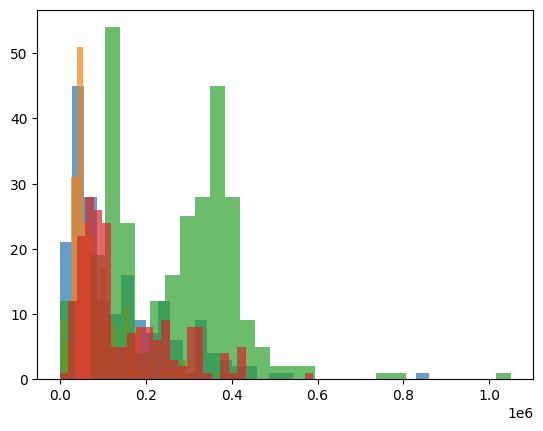

In [28]:

precio_leganes = subset[subset["level5"] == "Leganés"]["price"]
precio_getafe = subset[subset["level5"] == "Getafe"]["price"]
precio_fuenla = subset[subset["level5"] == "Fuenlabrada"]["price"]
precio_alcorcon = subset[subset["level5"] == "Alcorcón"]["price"]

norm_precio_leganes = (precio_leganes - precio_leganes.min() // precio_leganes.max() - precio_leganes.min())
norm_precio_getafe = (precio_getafe - precio_getafe.min() // precio_getafe.max() - precio_getafe.min())
norm_precio_fuenla = (precio_fuenla - precio_fuenla.min() // precio_fuenla.max() - precio_fuenla.min())
norm_precio_alcorcon = (precio_alcorcon - precio_alcorcon.min() // precio_alcorcon.max() - precio_alcorcon.min())

import matplotlib.pyplot as plt 

plt.hist(norm_precio_alcorcon, bins= 30, alpha= 0.7, label = "Alcorcón")
plt.hist(norm_precio_fuenla, bins= 30, alpha= 0.7, label = "Fuenlabrada")
plt.hist(norm_precio_getafe, bins= 30, alpha= 0.7, label = "Getafe")
plt.hist(norm_precio_leganes, bins= 30, alpha= 0.7, label = "Leganés")

plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

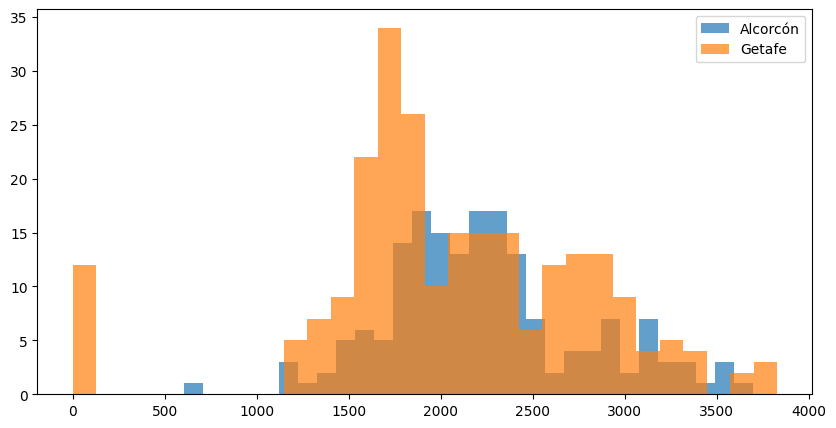

El precio medio por metro cuadrado en Getafe es mayor que en Alcorcón


In [53]:
subset['pps'] = subset['price'] // subset['surface'] 
preciometro = subset.groupby("level5")["pps"]
pob_alcorcon_pps= preciometro.get_group("Alcorcón")
pob_getafe_pps= preciometro.get_group("Getafe")


plt.figure(figsize =(10,5))
plt.hist(pob_alcorcon_pps, bins= 30, alpha= 0.7, label = "Alcorcón")
plt.hist(pob_getafe_pps, bins= 30, alpha= 0.7, label = "Getafe")
plt.legend()

plt.show()

print("El precio medio por metro cuadrado en Getafe es mayor que en Alcorcón")

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

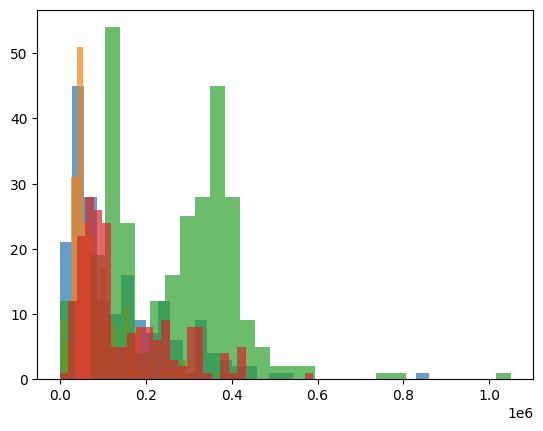

In [29]:

precio_leganes = subset[subset["level5"] == "Leganés"]["price"]
precio_getafe = subset[subset["level5"] == "Getafe"]["price"]
precio_fuenla = subset[subset["level5"] == "Fuenlabrada"]["price"]
precio_alcorcon = subset[subset["level5"] == "Alcorcón"]["price"]

norm_precio_leganes = (precio_leganes - precio_leganes.min() // precio_leganes.max() - precio_leganes.min())
norm_precio_getafe = (precio_getafe - precio_getafe.min() // precio_getafe.max() - precio_getafe.min())
norm_precio_fuenla = (precio_fuenla - precio_fuenla.min() // precio_fuenla.max() - precio_fuenla.min())
norm_precio_alcorcon = (precio_alcorcon - precio_alcorcon.min() // precio_alcorcon.max() - precio_alcorcon.min())

import matplotlib.pyplot as plt 

plt.hist(norm_precio_alcorcon, bins= 30, alpha= 0.7, label = "Alcorcón")
plt.hist(norm_precio_fuenla, bins= 30, alpha= 0.7, label = "Fuenlabrada")
plt.hist(norm_precio_getafe, bins= 30, alpha= 0.7, label = "Getafe")
plt.hist(norm_precio_leganes, bins= 30, alpha= 0.7, label = "Leganés")

plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [32]:
## HERE: plot the coordinates of the estates
coord_leganes = subset[subset["level5"] == "Leganés"][["latitude","longitude"]]
coord_getafe = subset[subset["level5"] == "Getafe"][["latitude","longitude"]]
coord_fuenla = subset[subset["level5"] == "Fuenlabrada"][["latitude","longitude"]]
coord_alcorcon = subset[subset["level5"] == "Alcorcón"][["latitude","longitude"]]



## PUT HERE YOUR CODE:

dict_leganes = dict(zip(coord_leganes.columns, coord_leganes.values[0]))
dict_getafe = dict(zip(coord_getafe.columns, coord_getafe.values[0]))
dict_fuenla = dict(zip(coord_fuenla.columns, coord_fuenla.values[0]))
dict_alcorcon = dict(zip(coord_alcorcon.columns, coord_alcorcon.values[0]))

color_leganes = colour(r = red)
color_getafe = colour(r = blue)
color_fuenla = colour(r = yellow)
color_alcorcon = colour(r = green)

map_leganes =  Marker(localitation = coord_leganes, draggable = False, title= "Leganés", icon = none, color = color_leganes)
map_getafe =  Marker(localitation = coord_getafe, draggable = False, title= "Getafe", icon = none, color = color_map_getafe)
map_fuenla =  Marker(localitation = coord_fuenla, draggable = False, title= "Fuenlabrada", icon = none, color = color_fuenla)
map_alcorcon =  Marker(localitation = coord_alcorcon, draggable = False, title= "Alcorcón", icon = none, color = color_alcorcon)

mymap.add_layer(map_leganes)
mymap.add_layer(map_getafe)
mymap.add_layer(map_fuenla)
mymap.add_layer(map_alcorcon)

mymap

NameError: name 'colour' is not defined